<br><br>
<p style="font-size:30px"> <b> Regression Model Development | Apprentice Chef Case </b> </p>

<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /> 
Jisung Jung <br> 
Masters of Business Analytics <br>
Machine Learning - DAT-5303 | FMsBA2 <br>
Hult International Business School <br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br>
<p style="font-size:20px"><strong> Analytical Objectives </strong> </p>
<br>
<li> Analyze datasets </li> 
<li> Develop top insights </li>
<li> Build a machine learning model to predict revenue over the first year of each customer’s life cycle </li>
<br>

<p style="font-size:20px"><strong> Basic Modeling Strategy for CONTINUOUS Response Variable: </strong> </p>
<br>
<strong>Prepare for Model Development</strong> <br>
Split dataset into training and testing sets<br>

<strong>Model Development in statsmodels</strong><br>
Experiment with different variable combinations in linear regression (OLS) and analyze results and save its variables as a new dataset<br>

<strong>Develop Candidate Models</strong><br>
Take model(s) with highest predictive power<br>

<strong>Prepare for Model Development on New Dataset</strong><br>
Split new dataset into training and testing sets<br>

<strong>Model Tournament</strong><br>
Experiment with different (regression) model types from statsmodels or scikit-learn. Also try to adjust the optional arguments of the permitted model types.<br><br>

<u> <b> Types of Machine Learning Model for experiment </b> </u>

<li> OLS Regression (standard linear regression) </li>
<li> Lasso Regression </li>
<li> Bayesian Automatic Relevance Determination (ARD) </li>
<li> K-Nearest Neighbors Regression (KNN) </li>
<br>

<u> <b> Output table of candidate models contains the following information: </b> </u>

<li> Model Type </li>
<li> Training Score </li>
<li> Testing Score </li>
<li> Train-Test Gap </li>
<li> Model Size (number of variables used plus the intercept) </li>
<li> Model Coefficients and Variables (when applicable) </li>
<li> It is clear which model is your final model (label it accordingly) </li>
<br>

<u> <b> NOTE </b> </u> <br>
<li> Gap between training and testing scores must be less than or equal to 0.05. </li>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

## Prepare for Model Development

In [1]:
# Import libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # enhanced data visualization
import numpy as np # mathematical essentials
import statsmodels.formula.api as smf # regression modeling
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# specifying the path and file name
file = "./datasets/Apprentice_Chef_Dataset.xlsx"

# reading the file into Python
apprenticechef = pd.read_excel(file)

# checking the file
apprenticechef.head(n = 5)

REVENUE  CROSS_SELL_SUCCESS               NAME                     EMAIL FIRST_NAME FAMILY_NAME  TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  PRODUCT_CATEGORIES_VIEWED  AVG_TIME_PER_SITE_VISIT  MOBILE_NUMBER  CANCELLATIONS_BEFORE_NOON  CANCELLATIONS_AFTER_NOON  TASTES_AND_PREFERENCES  PC_LOGINS  MOBILE_LOGINS  WEEKLY_PLAN  EARLY_DELIVERIES  LATE_DELIVERIES  PACKAGE_LOCKER  REFRIGERATED_LOCKER  AVG_PREP_VID_TIME  LARGEST_ORDER_SIZE  MASTER_CLASSES_ATTENDED  MEDIAN_MEAL_RATING  AVG_CLICKS_PER_VISIT  TOTAL_PHOTOS_VIEWED
0    393.0                   1            Saathos  saathos@unitedhealth.com    Saathos     Saathos                   14                   6                           12                         10                    48.00              1                          3                         1                       1          5              2            0                 0                2               0                    0               33.4                   1                        0                   1                    17                    0
1   1365.0                   1    Alysanne Osgrey    alysanne.osgrey@ge.org   Alysanne      Osgrey                   87                   3                            8                          8                    40.35              1                          0                         0                       1          5              1           12                 0                2               0                    0               84.8                   1                        0                   3                    13                  170
2    800.0                   1     Edwyd Fossoway    edwyd.fossoway@jnj.com      Edwyd    Fossoway                   15                   7                           11                          5                    19.77              1                          3                         0                       1          6              1            1                 0                1               0                    0               63.0                   1                        0                   2                    16                    0
3    600.0                   1  Eleyna Westerling  eleyna.westerling@ge.org     Eleyna  Westerling                   13                   6                           11                          5                    90.00              1                          2                         0                       1          6              1           14                 0                3               0                    0               43.8                   1                        0                   2                    14                    0
4   1490.0                   1      Elyn Norridge     elyn.norridge@jnj.com       Elyn    Norridge                   47                   8                            6                         10                    40.38              1                          0                         0                       0          5              1            5                 0                8               0                    0               84.8                   1                        1                   3                    12                  205

In [2]:
# Explore the dataset - row and column
apprenticechef.shape

(1946, 28)

In [3]:
apprenticechef.describe(include = 'number').round(decimals = 2)

REVENUE  CROSS_SELL_SUCCESS  TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  PRODUCT_CATEGORIES_VIEWED  AVG_TIME_PER_SITE_VISIT  MOBILE_NUMBER  CANCELLATIONS_BEFORE_NOON  CANCELLATIONS_AFTER_NOON  TASTES_AND_PREFERENCES  PC_LOGINS  MOBILE_LOGINS  WEEKLY_PLAN  EARLY_DELIVERIES  LATE_DELIVERIES  PACKAGE_LOCKER  REFRIGERATED_LOCKER  AVG_PREP_VID_TIME  LARGEST_ORDER_SIZE  MASTER_CLASSES_ATTENDED  MEDIAN_MEAL_RATING  AVG_CLICKS_PER_VISIT  TOTAL_PHOTOS_VIEWED
count  1946.00             1946.00              1946.00              1946.0                      1946.00                    1946.00                  1946.00        1946.00                    1946.00                   1946.00                 1946.00    1946.00        1946.00      1946.00           1946.00          1946.00         1946.00              1946.00            1946.00             1946.00                  1946.00             1946.00               1946.00              1946.00
mean   2107.29                0.68                74.63                 4.9                         6.98                       5.38                    99.60           0.88                       1.40                      0.17                    0.71       5.52           1.48        11.33              1.49             2.97            0.36                 0.11             150.56                4.44                     0.60                2.79                 13.51               106.43
std    1138.29                0.47                55.31                 2.5                         2.28                       3.04                    62.34           0.33                       1.55                      0.43                    0.45       0.58           0.53        13.57              2.32             2.74            0.48                 0.32              49.45                1.55                     0.64                0.76                  2.33               181.01
min     131.00                0.00                11.00                 1.0                         1.00                       1.00                    10.33           0.00                       0.00                      0.00                    0.00       4.00           0.00         0.00              0.00             0.00            0.00                 0.00              33.40                1.00                     0.00                1.00                  5.00                 0.00
25%    1350.00                0.00                39.00                 3.0                         5.00                       3.00                    72.00           1.00                       0.00                      0.00                    0.00       5.00           1.00         1.00              0.00             1.00            0.00                 0.00             114.40                3.00                     0.00                2.00                 12.00                 0.00
50%    1740.00                1.00                60.00                 5.0                         7.00                       5.00                    94.16           1.00                       1.00                      0.00                    1.00       6.00           1.00         7.00              0.00             2.00            0.00                 0.00             145.60                4.00                     1.00                3.00                 13.00                 0.00
75%    2670.00                1.00                95.00                 7.0                         8.00                       8.00                   117.29           1.00                       2.00                      0.00                    1.00       6.00           2.00        13.00              3.00             4.00            1.00                 0.00             173.78                5.00                     1.00                3.00                 15.00               174.00
max    8793.75                1.00               493.00                19.0                        18.00       

CONTINUOUS
*   TOTAL_MEALS_ORDERED
*   WEEKLY_PLAN
*   AVG_TIME_PER_SITE_VISIT
*   AVG_PREP_VID_TIME
*   TOTAL_PHOTOS_VIEWED

INTERVAL/COUNT
*   CROSS_SELL_SUCCESS (not to be used in modeling)
*   UNIQUE_MEALS_PURCH
*   CONTACTS_W_CUSTOMER_SERVICE
*   PRODUCT_CATEGORIES_VIEWED
*   CANCELLATIONS_BEFORE_NOON
*   CANCELLATIONS_AFTER_NOON
*   TASTES_AND_PREFERENCES (binary)
*   PC_LOGINS
*   MOBILE_LOGINS
*   EARLY_DELIVERIES
*   LATE_DELIVERIES
*   PACKAGE_LOCKER (binary)
*   REFRIGERATED_LOCKER (binary)
*   LARGEST_ORDER_SIZE
*   MASTER_CLASSES_ATTENDED
*   MEDIAN_MEAL_RATING
*   AVG_CLICKS_PER_VISIT

CATEGORICAL
*   EMAIL DOMAINS (ge, apple, nike, fedex, ...)
*   DOMAIN_GROUP (personal, professional, junk)
*   MOBILE_NUMBER (mobile, landline)
*   GENDER (male, female, unknown)



### Part I: Create the log transformed Revenue Variable 

In [4]:
# log transforming Sale_Price and saving it to the dataset
apprenticechef['log_REVENUE'] = np.log10(apprenticechef['REVENUE'])

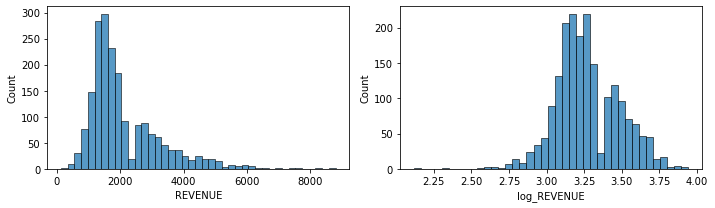

In [5]:
# displaying the plot for 'REVENUE' and 'log_REVENUE'

# setting figure size
fig, ax = plt.subplots(figsize = (10, 3))

# developing a boxplot
plt.subplot(1, 2, 1)
sns.histplot(data = apprenticechef, x = 'REVENUE')

# developing a boxplot
plt.subplot(1, 2, 2)
sns.histplot(data = apprenticechef, x = 'log_REVENUE')

# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()

### Part II: Missing Value Analysis and Imputation

In [6]:
# Show the number of missing values in the dataset.
# apprenticechef[apprenticechef.isna().any(axis=1)]
apprenticechef.isnull().sum(axis = 0)

REVENUE                         0
CROSS_SELL_SUCCESS              0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    47
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
MOBILE_NUMBER                   0
CANCELLATIONS_BEFORE_NOON       0
CANCELLATIONS_AFTER_NOON        0
TASTES_AND_PREFERENCES          0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
EARLY_DELIVERIES                0
LATE_DELIVERIES                 0
PACKAGE_LOCKER                  0
REFRIGERATED_LOCKER             0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
MASTER_CLASSES_ATTENDED         0
MEDIAN_MEAL_RATING              0
AVG_CLICKS_PER_VISIT            0
TOTAL_PHOTOS_VIEWED             0
log_REVENUE                     0
dtype: int64

In [7]:
# Impute the missing values for FAMILY_NAME

# instantiating an imputation value
fill = 'No info'

# imputing 'FAMILY_NAME'
apprenticechef['FAMILY_NAME'] = apprenticechef['FAMILY_NAME'].fillna(value = fill)

# making sure all missing values have been taken care of
apprenticechef.isnull().any(axis = 0).any(axis = 0)

False

### Part III: Developing Trend-Based Features

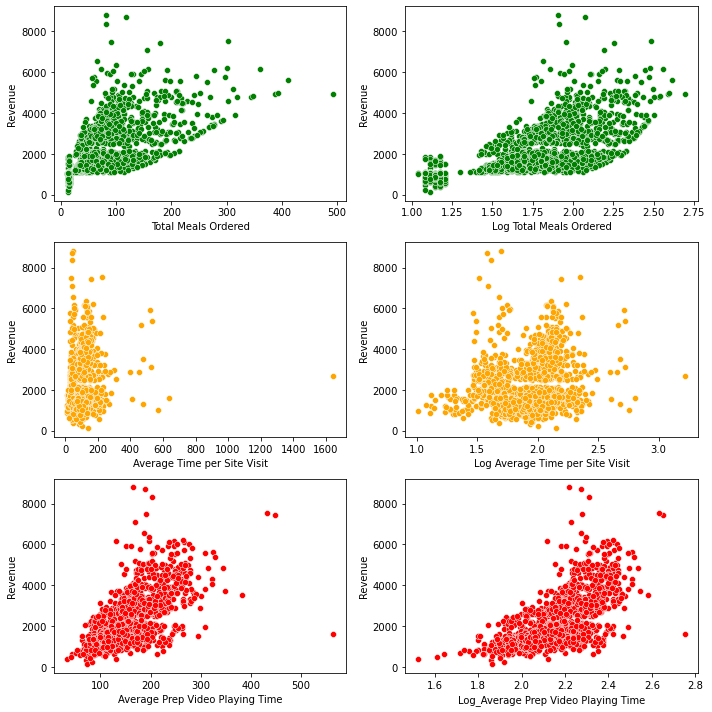

In [8]:
# Log transform countinuous data, saving this new variable to the apprenticechef dataset.
apprenticechef['log_TOTAL_MEALS_ORDERED'] = np.log10(apprenticechef['TOTAL_MEALS_ORDERED'])
apprenticechef['log_AVG_TIME_PER_SITE_VISIT'] = np.log10(apprenticechef['AVG_TIME_PER_SITE_VISIT'])
apprenticechef['log_AVG_PREP_VID_TIME'] = np.log10(apprenticechef['AVG_PREP_VID_TIME'])

# Comparing log transformation results

# setting figure size
fig, ax = plt.subplots(figsize = (10, 10))

#######################

# developing a scatterplot
plt.subplot(3, 2, 1)
sns.scatterplot(x = apprenticechef['TOTAL_MEALS_ORDERED'],
                y = apprenticechef['REVENUE'],
                color = 'g')

# adding labels but not adding title
plt.xlabel(xlabel = 'Total Meals Ordered')
plt.ylabel(ylabel = 'Revenue')

########################

# developing a scatterplot
plt.subplot(3, 2, 2)
sns.scatterplot(x = apprenticechef['log_TOTAL_MEALS_ORDERED'],
                y = apprenticechef['REVENUE'],
                color = 'g')

# adding labels but not adding title
plt.xlabel(xlabel = 'Log Total Meals Ordered')
plt.ylabel(ylabel = 'Revenue')

########################

# developing a scatterplot
plt.subplot(3, 2, 3)
sns.scatterplot(x = apprenticechef['AVG_TIME_PER_SITE_VISIT'],
                y = apprenticechef['REVENUE'],
                color = 'orange')

# adding labels but not adding title
plt.xlabel(xlabel = 'Average Time per Site Visit')
plt.ylabel(ylabel = 'Revenue')

########################

# developing a scatterplot
plt.subplot(3, 2, 4)
sns.scatterplot(x = apprenticechef['log_AVG_TIME_PER_SITE_VISIT'],
                y = apprenticechef['REVENUE'],
                color = 'orange')

# adding labels but not adding title
plt.xlabel(xlabel = 'Log Average Time per Site Visit')
plt.ylabel(ylabel = 'Revenue')

########################

# developing a scatterplot
plt.subplot(3, 2, 5)
sns.scatterplot(x = apprenticechef['AVG_PREP_VID_TIME'],
                y = apprenticechef['REVENUE'],
                color = 'r')

# adding labels but not adding title
plt.xlabel(xlabel = 'Average Prep Video Playing Time')
plt.ylabel(ylabel = 'Revenue')

########################

# developing a scatterplot
plt.subplot(3, 2, 6)
sns.scatterplot(x = apprenticechef['log_AVG_PREP_VID_TIME'],
                y = apprenticechef['REVENUE'],
                color = 'r')

# adding labels but not adding title
plt.xlabel(xlabel = 'Log_Average Prep Video Playing Time')
plt.ylabel(ylabel = 'Revenue')

########################
# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()

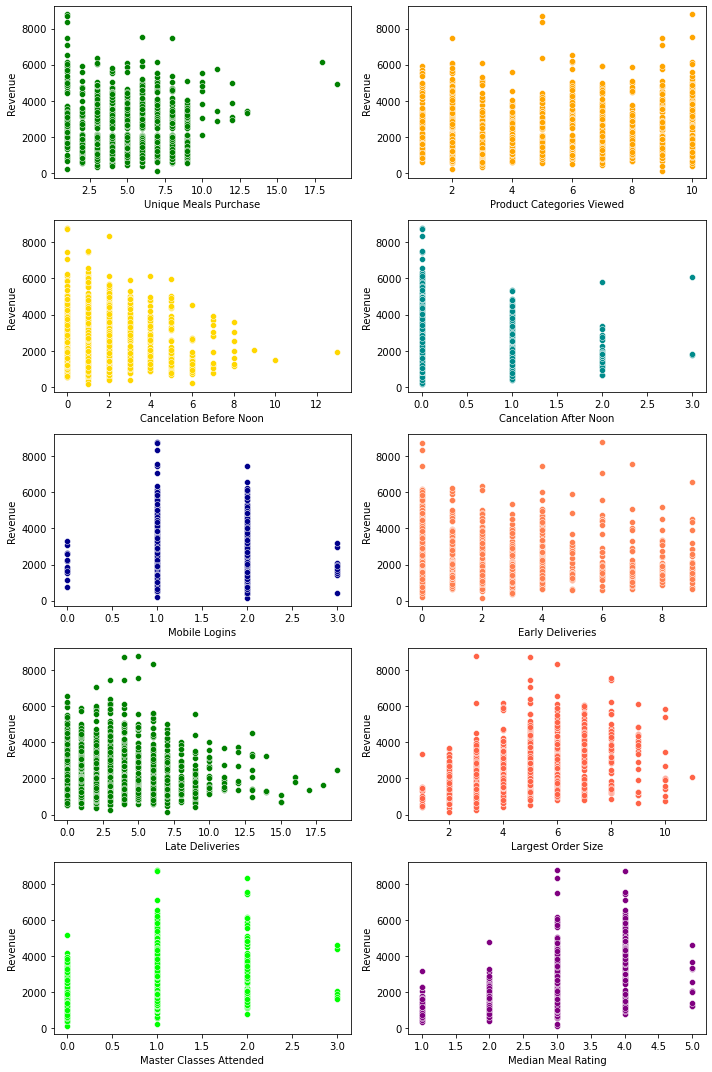

In [9]:
# setting figure size
fig, ax = plt.subplots(figsize = (10, 15))

# developing a scatterplot
plt.subplot(5, 2, 1)
sns.scatterplot(x = apprenticechef['UNIQUE_MEALS_PURCH'],
                y = apprenticechef['REVENUE'],
                color = 'g')

# adding labels but not adding title
plt.xlabel(xlabel = 'Unique Meals Purchase')
plt.ylabel(ylabel = 'Revenue')

########################

# developing a scatterplot
plt.subplot(5, 2, 2)
sns.scatterplot(x = apprenticechef['PRODUCT_CATEGORIES_VIEWED'],
                y = apprenticechef['REVENUE'],
                color = 'orange')

# adding labels but not adding title
plt.xlabel(xlabel = 'Product Categories Viewed')
plt.ylabel(ylabel = 'Revenue')

########################

# developing a scatterplot
plt.subplot(5, 2, 3)
sns.scatterplot(x = apprenticechef['CANCELLATIONS_BEFORE_NOON'],
                y = apprenticechef['REVENUE'],
                color = 'gold')

# adding labels but not adding title
plt.xlabel(xlabel = 'Cancelation Before Noon')
plt.ylabel(ylabel = 'Revenue')

########################

# developing a scatterplot
plt.subplot(5, 2, 4)
sns.scatterplot(x = apprenticechef['CANCELLATIONS_AFTER_NOON'],
                y = apprenticechef['REVENUE'],
                color = 'darkcyan')

# adding labels but not adding title
plt.xlabel(xlabel = 'Cancelation After Noon')
plt.ylabel(ylabel = 'Revenue')

########################

# developing a scatterplot
plt.subplot(5, 2, 5)
sns.scatterplot(x = apprenticechef['MOBILE_LOGINS'],
                y = apprenticechef['REVENUE'],
                color = 'darkblue')

# adding labels but not adding title
plt.xlabel(xlabel = 'Mobile Logins')
plt.ylabel(ylabel = 'Revenue')

########################

# developing a scatterplot
plt.subplot(5, 2, 6)
sns.scatterplot(x = apprenticechef['EARLY_DELIVERIES'],
                y = apprenticechef['REVENUE'],
                color = 'coral')

# adding labels but not adding title
plt.xlabel(xlabel = 'Early Deliveries')
plt.ylabel(ylabel = 'Revenue')

########################

# developing a scatterplot
plt.subplot(5, 2, 7)
sns.scatterplot(x = apprenticechef['LATE_DELIVERIES'],
                y = apprenticechef['REVENUE'],
                color = 'green')

# adding labels but not adding title
plt.xlabel(xlabel = 'Late Deliveries')
plt.ylabel(ylabel = 'Revenue')

########################

# developing a scatterplot
plt.subplot(5, 2, 8)
sns.scatterplot(x = apprenticechef['LARGEST_ORDER_SIZE'],
                y = apprenticechef['REVENUE'],
                color = 'tomato')

# adding labels but not adding title
plt.xlabel(xlabel = 'Largest Order Size')
plt.ylabel(ylabel = 'Revenue')

########################

# developing a scatterplot
plt.subplot(5, 2, 9)
sns.scatterplot(x = apprenticechef['MASTER_CLASSES_ATTENDED'],
                y = apprenticechef['REVENUE'],
                color = 'lime')

# adding labels but not adding title
plt.xlabel(xlabel = 'Master Classes Attended')
plt.ylabel(ylabel = 'Revenue')

########################

# developing a scatterplot
plt.subplot(5, 2, 10)
sns.scatterplot(x = apprenticechef['MEDIAN_MEAL_RATING'],
                y = apprenticechef['REVENUE'],
                color = 'purple')

# adding labels but not adding title
plt.xlabel(xlabel = 'Median Meal Rating')
plt.ylabel(ylabel = 'Revenue')

########################

# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()

In [10]:
# counting the number of zeroes
UNIQUE_MEALS_PURCH_zeroes        = len(apprenticechef['UNIQUE_MEALS_PURCH'][apprenticechef['UNIQUE_MEALS_PURCH'] == 0])
PRODUCT_CATEGORIES_VIEWED_zeroes = len(apprenticechef['PRODUCT_CATEGORIES_VIEWED'][apprenticechef['PRODUCT_CATEGORIES_VIEWED'] == 0]) 
CANCELLATIONS_BEFORE_NOON_zeroes = len(apprenticechef['CANCELLATIONS_BEFORE_NOON'][apprenticechef['CANCELLATIONS_BEFORE_NOON'] == 0])
CANCELLATIONS_AFTER_NOON_zeroes  = len(apprenticechef['CANCELLATIONS_AFTER_NOON'][apprenticechef['CANCELLATIONS_AFTER_NOON'] == 0]) 
MOBILE_LOGINS_zeroes             = len(apprenticechef['MOBILE_LOGINS'][apprenticechef['MOBILE_LOGINS'] == 0])
EARLY_DELIVERIES_zeroes          = len(apprenticechef['EARLY_DELIVERIES'][apprenticechef['EARLY_DELIVERIES'] == 0])
LATE_DELIVERIES_zeroes           = len(apprenticechef['LATE_DELIVERIES'][apprenticechef['LATE_DELIVERIES'] == 0])
LARGEST_ORDER_SIZE_zeroes        = len(apprenticechef['LARGEST_ORDER_SIZE'][apprenticechef['LARGEST_ORDER_SIZE'] == 0])
MASTER_CLASSES_ATTENDED_zeroes   = len(apprenticechef['MASTER_CLASSES_ATTENDED'][apprenticechef['MASTER_CLASSES_ATTENDED'] == 0])
MEDIAN_MEAL_RATING_zeroes        = len(apprenticechef['MEDIAN_MEAL_RATING'][apprenticechef['MEDIAN_MEAL_RATING'] == 0])
TOTAL_MEALS_ORDERED_zeroes       = len(apprenticechef['TOTAL_MEALS_ORDERED'][apprenticechef['TOTAL_MEALS_ORDERED'] == 0])
WEEKLY_PLAN_zeroes               = len(apprenticechef['WEEKLY_PLAN'][apprenticechef['WEEKLY_PLAN'] == 0])
AVG_TIME_PER_SITE_VISIT_zeroes   = len(apprenticechef['AVG_TIME_PER_SITE_VISIT'][apprenticechef['AVG_TIME_PER_SITE_VISIT'] == 0])
AVG_PREP_VID_TIME_zeroes         = len(apprenticechef['AVG_PREP_VID_TIME'][apprenticechef['AVG_PREP_VID_TIME'] == 0])
TOTAL_PHOTOS_VIEWED_zeroes       = len(apprenticechef['TOTAL_PHOTOS_VIEWED'][apprenticechef['TOTAL_PHOTOS_VIEWED'] == 0])

# printing a table of the results
print(f"""

Counting > 0
-------------
                           No\t\tYes
                         ---------------------
UNIQUE_MEALS_PURCH       | {UNIQUE_MEALS_PURCH_zeroes}\t\t{len(apprenticechef) - UNIQUE_MEALS_PURCH_zeroes}
PRODUCT_CATEGORIES_VIEWED| {PRODUCT_CATEGORIES_VIEWED_zeroes}\t\t{len(apprenticechef) - PRODUCT_CATEGORIES_VIEWED_zeroes}
CANCELLATIONS_BEFORE_NOON| {CANCELLATIONS_BEFORE_NOON_zeroes}\t\t{len(apprenticechef) - CANCELLATIONS_BEFORE_NOON_zeroes}
CANCELLATIONS_AFTER_NOON | {CANCELLATIONS_AFTER_NOON_zeroes}\t\t{len(apprenticechef) - CANCELLATIONS_AFTER_NOON_zeroes}
MOBILE_LOGINS            | {MOBILE_LOGINS_zeroes}\t\t{len(apprenticechef) - MOBILE_LOGINS_zeroes}
EARLY_DELIVERIES         | {EARLY_DELIVERIES_zeroes}\t\t{len(apprenticechef) - EARLY_DELIVERIES_zeroes}
LATE_DELIVERIES          | {LATE_DELIVERIES_zeroes}\t\t{len(apprenticechef) - LATE_DELIVERIES_zeroes}
LARGEST_ORDER_SIZE       | {LARGEST_ORDER_SIZE_zeroes}\t\t{len(apprenticechef) - LARGEST_ORDER_SIZE_zeroes}
MASTER_CLASSES_ATTENDED  | {MASTER_CLASSES_ATTENDED_zeroes}\t\t{len(apprenticechef) - MASTER_CLASSES_ATTENDED_zeroes}
MEDIAN_MEAL_RATING       | {MEDIAN_MEAL_RATING_zeroes}\t\t{len(apprenticechef) - MEDIAN_MEAL_RATING_zeroes}
TOTAL_MEALS_ORDERED      | {TOTAL_MEALS_ORDERED_zeroes}\t\t{len(apprenticechef) - TOTAL_MEALS_ORDERED_zeroes}
WEEKLY_PLAN              | {WEEKLY_PLAN_zeroes}\t\t{len(apprenticechef) - WEEKLY_PLAN_zeroes}
AVG_TIME_PER_SITE_VISIT  | {AVG_TIME_PER_SITE_VISIT_zeroes}\t\t{len(apprenticechef) - AVG_TIME_PER_SITE_VISIT_zeroes}
AVG_PREP_VID_TIME        | {AVG_PREP_VID_TIME_zeroes}\t\t{len(apprenticechef) - AVG_PREP_VID_TIME_zeroes}
TOTAL_PHOTOS_VIEWED      | {TOTAL_PHOTOS_VIEWED_zeroes}\t\t{len(apprenticechef) - TOTAL_PHOTOS_VIEWED_zeroes}
""")



Counting > 0
-------------
                           No		Yes
                         ---------------------
UNIQUE_MEALS_PURCH       | 0		1946
PRODUCT_CATEGORIES_VIEWED| 0		1946
CANCELLATIONS_BEFORE_NOON| 667		1279
CANCELLATIONS_AFTER_NOON | 1667		279
MOBILE_LOGINS            | 16		1930
EARLY_DELIVERIES         | 1167		779
LATE_DELIVERIES          | 319		1627
LARGEST_ORDER_SIZE       | 0		1946
MASTER_CLASSES_ATTENDED  | 932		1014
MEDIAN_MEAL_RATING       | 0		1946
TOTAL_MEALS_ORDERED      | 0		1946
WEEKLY_PLAN              | 468		1478
AVG_TIME_PER_SITE_VISIT  | 0		1946
AVG_PREP_VID_TIME        | 0		1946
TOTAL_PHOTOS_VIEWED      | 1140		806



In [11]:
# counting the number of thresholds

TOTAL_MEALS_ORDERED_thresholds         = len(apprenticechef['TOTAL_MEALS_ORDERED'][apprenticechef['TOTAL_MEALS_ORDERED'] < 53])
UNIQUE_MEALS_PURCH_thresholds          = len(apprenticechef['UNIQUE_MEALS_PURCH'][apprenticechef['UNIQUE_MEALS_PURCH'] < 9])
CONTACTS_W_CUSTOMER_SERVICE_thresholds = len(apprenticechef['CONTACTS_W_CUSTOMER_SERVICE'][apprenticechef['CONTACTS_W_CUSTOMER_SERVICE'] < 10])
LARGEST_ORDER_SIZE_thresholds          = len(apprenticechef['LARGEST_ORDER_SIZE'][apprenticechef['LARGEST_ORDER_SIZE'] < 8])
AVG_CLICKS_PER_VISIT_thresholds        = len(apprenticechef['AVG_CLICKS_PER_VISIT'][apprenticechef['AVG_CLICKS_PER_VISIT'] < 10])
WEEKLY_PLAN_thresholds                 = len(apprenticechef['WEEKLY_PLAN'][apprenticechef['WEEKLY_PLAN'] < 1])
MASTER_CLASSES_ATTENDED_thresholds     = len(apprenticechef['MASTER_CLASSES_ATTENDED'][apprenticechef['MASTER_CLASSES_ATTENDED'] < 2])
MEDIAN_MEAL_RATING_thresholds          = len(apprenticechef['MEDIAN_MEAL_RATING'][apprenticechef['MEDIAN_MEAL_RATING'] < 4])



# printing a table of the results
print(f"""

Counting the number of thresholds
---------------------------------

                                  No\t\tYes
                                  ---------------------
TOTAL_MEALS_ORDERED > 53         | {TOTAL_MEALS_ORDERED_thresholds}\t\t{len(apprenticechef) - TOTAL_MEALS_ORDERED_thresholds}
UNIQUE_MEALS_PURCH > 9           | {UNIQUE_MEALS_PURCH_thresholds}\t\t{len(apprenticechef) - UNIQUE_MEALS_PURCH_thresholds}
CONTACTS_W_CUSTOMER_SERVICE > 10 | {CONTACTS_W_CUSTOMER_SERVICE_thresholds}\t\t{len(apprenticechef) - CONTACTS_W_CUSTOMER_SERVICE_thresholds}
LARGEST_ORDER_SIZE > 8           | {LARGEST_ORDER_SIZE_thresholds}\t\t{len(apprenticechef) - LARGEST_ORDER_SIZE_thresholds}
AVG_CLICKS_PER_VISIT > 10        | {AVG_CLICKS_PER_VISIT_thresholds}\t\t{len(apprenticechef) - AVG_CLICKS_PER_VISIT_thresholds}
WEEKLY_PLAN > 1                  | {WEEKLY_PLAN_thresholds}\t\t{len(apprenticechef) - WEEKLY_PLAN_thresholds}
MASTER_CLASSES_ATTENDED > 2      | {MASTER_CLASSES_ATTENDED_thresholds}\t\t{len(apprenticechef) - MASTER_CLASSES_ATTENDED_thresholds}
MEDIAN_MEAL_RATING > 4           | {MEDIAN_MEAL_RATING_thresholds}\t\t{len(apprenticechef) - MEDIAN_MEAL_RATING_thresholds}
""")



Counting the number of thresholds
---------------------------------

                                  No		Yes
                                  ---------------------
TOTAL_MEALS_ORDERED > 53         | 817		1129
UNIQUE_MEALS_PURCH > 9           | 1765		181
CONTACTS_W_CUSTOMER_SERVICE > 10 | 1662		284
LARGEST_ORDER_SIZE > 8           | 1864		82
AVG_CLICKS_PER_VISIT > 10        | 97		1849
WEEKLY_PLAN > 1                  | 468		1478
MASTER_CLASSES_ATTENDED > 2      | 1790		156
MEDIAN_MEAL_RATING > 4           | 1673		273



In [12]:
# Dummy variable for having a zeroes
apprenticechef['have_CANCELLATIONS_BEFORE_NOON'] = 0
apprenticechef['have_CANCELLATIONS_AFTER_NOON'] = 0
apprenticechef['have_EARLY_DELIVERIES'] = 0
apprenticechef['have_LATE_DELIVERIES'] = 0   
apprenticechef['have_MASTER_CLASSES_ATTENDED'] = 0
apprenticechef['have_WEEKLY_PLAN'] = 0
apprenticechef['have_PHOTOS_VIEWED']  = 0

# iterating over each original column to
# change values in the new feature columns
for index, value in apprenticechef.iterrows():

    # CANCELLATIONS_BEFORE_NOON
    if apprenticechef.loc[index, "CANCELLATIONS_BEFORE_NOON"] > 0:
        apprenticechef.loc[index, 'have_CANCELLATIONS_BEFORE_NOON'] = 1
        
    # CANCELLATIONS_AFTER_NOON
    if apprenticechef.loc[index, "CANCELLATIONS_AFTER_NOON"] > 0:
        apprenticechef.loc[index, 'have_CANCELLATIONS_AFTER_NOON'] = 1

    # EARLY_DELIVERIES
    if apprenticechef.loc[index, "EARLY_DELIVERIES"] > 0:
        apprenticechef.loc[index, 'have_EARLY_DELIVERIES'] = 1

    # LATE_DELIVERIES
    if apprenticechef.loc[index, "LATE_DELIVERIES"] > 0:
        apprenticechef.loc[index, 'have_LATE_DELIVERIES'] = 1

    # MASTER_CLASSES_ATTENDED
    if apprenticechef.loc[index, "MASTER_CLASSES_ATTENDED"] > 0:
        apprenticechef.loc[index, 'have_MASTER_CLASSES_ATTENDED'] = 1    
    
    # WEEKLY_PLAN
    if apprenticechef.loc[index, "WEEKLY_PLAN"] > 0:
        apprenticechef.loc[index, 'have_WEEKLY_PLAN'] = 1
        
    # PHOTOS_VIEWED
    if apprenticechef.loc[index, "TOTAL_PHOTOS_VIEWED"] > 0:
        apprenticechef.loc[index, 'have_PHOTOS_VIEWED'] = 1

# developing a small correlation matrix
zeroes_corr = apprenticechef.corr()    # .round(decimals = 2)

# checking the correlations of the newly-created variables with Revenue
zeroes_corr.loc['REVENUE',                                   # Y-variable
               ['have_CANCELLATIONS_BEFORE_NOON', 'have_CANCELLATIONS_AFTER_NOON', 'have_EARLY_DELIVERIES', # X-variables
                'have_LATE_DELIVERIES', 'have_MASTER_CLASSES_ATTENDED', 'have_WEEKLY_PLAN', 'have_PHOTOS_VIEWED']] \
                .sort_values(ascending = False)

have_MASTER_CLASSES_ATTENDED      0.453022
have_PHOTOS_VIEWED                0.372072
have_CANCELLATIONS_BEFORE_NOON    0.024267
have_EARLY_DELIVERIES             0.013471
have_LATE_DELIVERIES             -0.017615
have_WEEKLY_PLAN                 -0.032196
have_CANCELLATIONS_AFTER_NOON    -0.040339
Name: REVENUE, dtype: float64

In [13]:
# Dummy variable for thresholds
apprenticechef['thld_TOTAL_MEALS_ORDERED'] = 0
apprenticechef['thld_UNIQUE_MEALS_PURCH'] = 0
apprenticechef['thld_CONTACTS_W_CUSTOMER_SERVICE'] = 0
apprenticechef['thld_LARGEST_ORDER_SIZE'] = 0   
apprenticechef['thld_AVG_CLICKS_PER_VISIT'] = 0
apprenticechef['thld_WEEKLY_PLAN'] = 0
apprenticechef['thld_MASTER_CLASSES_ATTENDED'] = 0
apprenticechef['thld_MEDIAN_MEAL_RATING'] = 0

# iterating over each original column to
# change values in the new feature columns
for index, value in apprenticechef.iterrows():

    # TOTAL_MEALS_ORDERED
    if apprenticechef.loc[index, "TOTAL_MEALS_ORDERED"] > 53:
        apprenticechef.loc[index, 'thld_TOTAL_MEALS_ORDERED'] = 1
        
    # UNIQUE_MEALS_PURCH
    if apprenticechef.loc[index, "UNIQUE_MEALS_PURCH"] > 9:
        apprenticechef.loc[index, 'thld_UNIQUE_MEALS_PURCH'] = 1

    # CONTACTS_W_CUSTOMER_SERVICE
    if apprenticechef.loc[index, "CONTACTS_W_CUSTOMER_SERVICE"] > 10:
        apprenticechef.loc[index, 'thld_CONTACTS_W_CUSTOMER_SERVICE'] = 1

    # LARGEST_ORDER_SIZE
    if apprenticechef.loc[index, "LARGEST_ORDER_SIZE"] > 8:
        apprenticechef.loc[index, 'thld_LARGEST_ORDER_SIZE'] = 1

    # AVG_CLICKS_PER_VISIT
    if apprenticechef.loc[index, "AVG_CLICKS_PER_VISIT"] > 10:
        apprenticechef.loc[index, 'thld_AVG_CLICKS_PER_VISIT'] = 1    
    
    # WEEKLY_PLAN
    if apprenticechef.loc[index, "WEEKLY_PLAN"] > 1:
        apprenticechef.loc[index, 'thld_WEEKLY_PLAN'] = 1

    # MASTER_CLASSES_ATTENDED
    if apprenticechef.loc[index, "MASTER_CLASSES_ATTENDED"] > 2:
        apprenticechef.loc[index, 'thld_MASTER_CLASSES_ATTENDED'] = 1

    # MEDIAN_MEAL_RATING
    if apprenticechef.loc[index, "MEDIAN_MEAL_RATING"] > 4:
        apprenticechef.loc[index, 'thld_MEDIAN_MEAL_RATING'] = 1    
        
# developing a small correlation matrix
zeroes_corr = apprenticechef.corr()    # .round(decimals = 2)

# checking the correlations of the newly-created variables with Revenue
zeroes_corr.loc['REVENUE',                                   # Y-variable
               ['thld_TOTAL_MEALS_ORDERED', 'thld_UNIQUE_MEALS_PURCH', 'thld_CONTACTS_W_CUSTOMER_SERVICE', # X-variables
                'thld_LARGEST_ORDER_SIZE', 'thld_AVG_CLICKS_PER_VISIT', 'thld_WEEKLY_PLAN', 'thld_MASTER_CLASSES_ATTENDED',
                'thld_MEDIAN_MEAL_RATING']] \
                .sort_values(ascending = False)

thld_TOTAL_MEALS_ORDERED            0.486958
thld_UNIQUE_MEALS_PURCH             0.170541
thld_LARGEST_ORDER_SIZE             0.093363
thld_MEDIAN_MEAL_RATING             0.037457
thld_MASTER_CLASSES_ATTENDED        0.030056
thld_WEEKLY_PLAN                   -0.023280
thld_CONTACTS_W_CUSTOMER_SERVICE   -0.359522
thld_AVG_CLICKS_PER_VISIT          -0.502136
Name: REVENUE, dtype: float64

### Part IV: Working with with Interval and Count Data

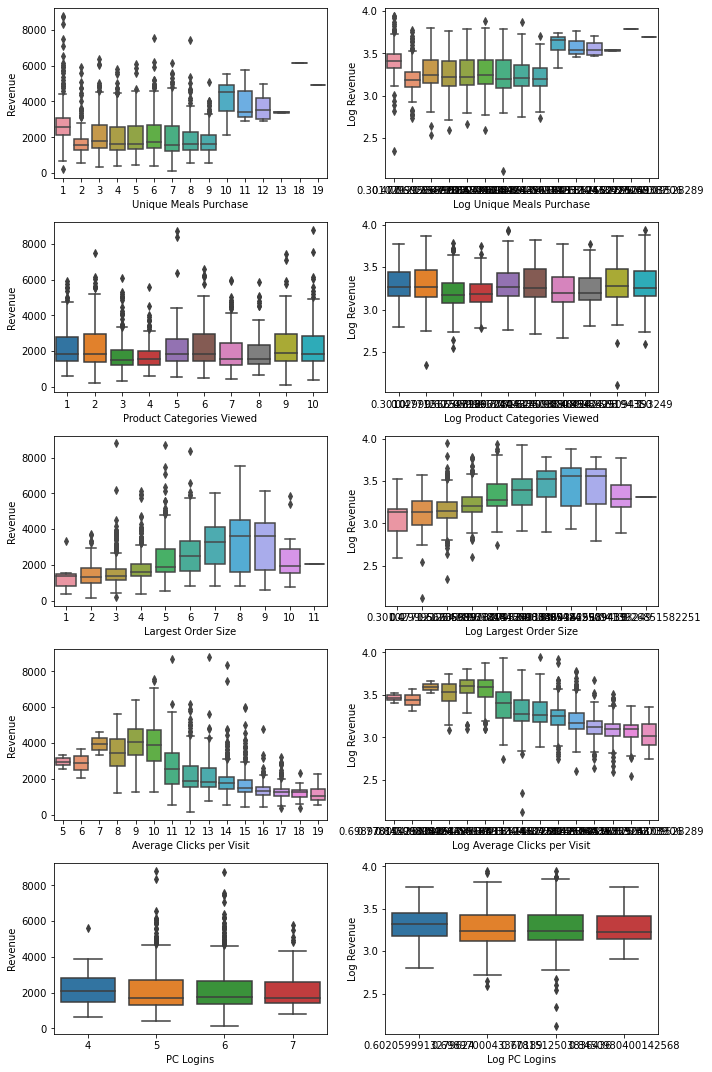

In [14]:
# Log transform Interval and Count Data, saving this new variable to the apprenticechef dataset.
apprenticechef['log_UNIQUE_MEALS_PURCH'] = np.log10(apprenticechef['UNIQUE_MEALS_PURCH'])
apprenticechef['log_PRODUCT_CATEGORIES_VIEWED'] = np.log10(apprenticechef['PRODUCT_CATEGORIES_VIEWED'])
apprenticechef['log_LARGEST_ORDER_SIZE'] = np.log10(apprenticechef['LARGEST_ORDER_SIZE'])
apprenticechef['log_AVG_CLICKS_PER_VISIT'] = np.log10(apprenticechef['AVG_CLICKS_PER_VISIT'])
apprenticechef['log_PC_LOGINS'] = np.log10(apprenticechef['PC_LOGINS'])

# Comparing log transformation results

# setting figure size
fig, ax = plt.subplots(figsize = (10, 15))

########################

# developing a boxplot
plt.subplot(5, 2, 1)
sns.boxplot(x = 'UNIQUE_MEALS_PURCH',
            y = 'REVENUE',
            data = apprenticechef)

# adding labels but not adding title
plt.xlabel(xlabel = 'Unique Meals Purchase')
plt.ylabel(ylabel = 'Revenue')

########################

# developing a boxplot
plt.subplot(5, 2, 2)
sns.boxplot(x = 'log_UNIQUE_MEALS_PURCH',
            y = 'log_REVENUE',
            data = apprenticechef)

# adding labels but not adding title
plt.xlabel(xlabel = 'Log Unique Meals Purchase')
plt.ylabel(ylabel = 'Log Revenue')

########################

# developing a scatterplot
plt.subplot(5, 2, 3)
sns.boxplot(x = 'PRODUCT_CATEGORIES_VIEWED',
            y = 'REVENUE',
            data = apprenticechef)

# adding labels but not adding title
plt.xlabel(xlabel = 'Product Categories Viewed')
plt.ylabel(ylabel = 'Revenue')

########################

# developing a scatterplot
plt.subplot(5, 2, 4)
sns.boxplot(x = 'log_PRODUCT_CATEGORIES_VIEWED',
            y = 'log_REVENUE',
            data = apprenticechef)

# adding labels but not adding title
plt.xlabel(xlabel = 'Log Product Categories Viewed')
plt.ylabel(ylabel = 'Log Revenue')

########################

# developing a boxplot
plt.subplot(5, 2, 5)
sns.boxplot(x    = 'LARGEST_ORDER_SIZE',
            y    = 'REVENUE',
            data = apprenticechef)

# adding labels but not adding title
plt.xlabel(xlabel = 'Largest Order Size')
plt.ylabel(ylabel = 'Revenue')

########################

# developing a boxplot
plt.subplot(5, 2, 6)
sns.boxplot(x    = 'log_LARGEST_ORDER_SIZE',
            y    = 'log_REVENUE',
            data = apprenticechef)

# adding labels but not adding title
plt.xlabel(xlabel = 'Log Largest Order Size')
plt.ylabel(ylabel = 'Log Revenue')

########################

# developing a boxplot
plt.subplot(5, 2, 7)
sns.boxplot(x = 'AVG_CLICKS_PER_VISIT',
            y = 'REVENUE',
            data = apprenticechef)

# adding labels but not adding title
plt.xlabel(xlabel = 'Average Clicks per Visit')
plt.ylabel(ylabel = 'Revenue')

########################

# developing a boxplot
plt.subplot(5, 2, 8)
sns.boxplot(x = 'log_AVG_CLICKS_PER_VISIT',
            y = 'log_REVENUE',
            data = apprenticechef)

# adding labels but not adding title
plt.xlabel(xlabel = 'Log Average Clicks per Visit')
plt.ylabel(ylabel = 'Log Revenue')

########################

# developing a boxplot
plt.subplot(5, 2, 9)
sns.boxplot(x = 'PC_LOGINS',
            y = 'REVENUE',
            data = apprenticechef)

# adding labels but not adding title
plt.xlabel(xlabel = 'PC Logins')
plt.ylabel(ylabel = 'Revenue')

########################

# developing a boxplot
plt.subplot(5, 2, 10)
sns.boxplot(x = 'log_PC_LOGINS',
            y = 'log_REVENUE',
            data = apprenticechef)

# adding labels but not adding title
plt.xlabel(xlabel = 'Log PC Logins')
plt.ylabel(ylabel = 'Log Revenue')

########################

# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()

### Part V: Encoding Categorical Data

#### Split personal emails and make Domain group

In [15]:
# STEP 1: splitting personal emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in apprenticechef.iterrows():
    
    # splitting email domain at '@'
    split_email = apprenticechef.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    
# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# STEP 2: concatenating with original DataFrame

# renaming column to concatenate
email_df.columns = ['0', 'TEMP1_DOMAINS']

# concatenating personal_email_domain with friends DataFrame
apprenticechef = pd.concat([apprenticechef, email_df['TEMP1_DOMAINS']], axis = 1)

# printing value counts of personal_email_domain
apprenticechef.loc[: ,'TEMP1_DOMAINS'].value_counts()


# STEP 3: Aggregate the email domains into domain groups

# email domain types
professional_email_domains = ['@mmm.com', '@amex.com', '@apple.com', '@boeing.com',
                              '@caterpillar.com', '@chevron.com', '@cisco.com',
                              '@cocacola.com', '@disney.com', '@dupont.com',
                              '@exxon.com', '@ge.org', '@goldmansacs.com',
                              '@homedepot.com', '@ibm.com', '@intel.com', '@jnj.com',
                              '@jpmorgan.com', '@mcdonalds.com', '@merck.com',
                              '@microsoft.com', '@nike.com', '@pfizer.com', '@pg.com',
                              '@travelers.com', '@unitedtech.com', '@unitedhealth.com',
                              '@verizon.com', '@visa.com', '@walmart.com']
personal_email_domains  = ['@gmail.com', '@yahoo.com', '@protonmail.com']
junk_email_domains  = ['@me.com', '@aol.com', '@hotmail.com', 
                       '@live.com', '@msn.com', '@passport.com']

# placeholder list
placeholder_lst = []

# looping to group observations by domain type
for domain in apprenticechef['TEMP1_DOMAINS']:
    if '@' + domain in professional_email_domains:
        placeholder_lst.append('professional')
            
    elif '@' + domain in personal_email_domains:
        placeholder_lst.append('personal')

    elif '@' + domain in junk_email_domains:
        placeholder_lst.append('junk')

    else:
        print('Unknown')

# concatenating with original DataFrame
apprenticechef['DOMAIN_GROUP'] = pd.Series(placeholder_lst)

# checking results
print(f"""
Domain Group
------------
{apprenticechef['DOMAIN_GROUP'].value_counts()}
""")

# STEP 4: remove .com and .org from domain names

placeholder_lst = []

for index, col in apprenticechef.iterrows():
    if ".com" in apprenticechef.loc[index, 'TEMP1_DOMAINS']:
        split_email = apprenticechef.loc[index, 'TEMP1_DOMAINS'].replace(".com", "")
    if ".org" in apprenticechef.loc[index, 'TEMP1_DOMAINS']:
        split_email = apprenticechef.loc[index, 'TEMP1_DOMAINS'].replace(".org", "")
    placeholder_lst.append(split_email)

domain_df = pd.DataFrame(placeholder_lst)
domain_df.columns = ['TEMP2_DOMAINS']

apprenticechef = pd.concat([apprenticechef, domain_df['TEMP2_DOMAINS']], axis = 1)

# printing value counts of personal_email_domain
print(f"""
Domain Name
-----------
{apprenticechef.loc[: ,'TEMP2_DOMAINS'].value_counts()}
""")


Domain Group
------------
personal        861
professional    696
junk            389
Name: DOMAIN_GROUP, dtype: int64


Domain Name
-----------
gmail           303
protonmail      284
yahoo           274
msn              72
aol              69
passport         64
hotmail          63
live             62
me               59
amex             30
cocacola         28
merck            28
mcdonalds        28
jnj              28
apple            27
nike             27
ibm              26
ge               26
dupont           26
microsoft        25
chevron          25
unitedhealth     24
exxon            24
travelers        24
boeing           23
verizon          22
caterpillar      22
pg               22
mmm              22
walmart          21
disney           21
visa             20
pfizer           20
jpmorgan         19
goldmansacs      18
unitedtech       18
cisco            18
homedepot        17
intel            17
Name: TEMP2_DOMAINS, dtype: int64



#### Change MOBILE_NUMBER values into mobile and landline

In [16]:
for index, col in apprenticechef.iterrows():
    if apprenticechef.loc[index, 'MOBILE_NUMBER'] == 1:
      apprenticechef.loc[index, 'MOBILE_NUMBER'] = 'mobile'
    else:
      apprenticechef.loc[index, 'MOBILE_NUMBER'] = 'landline'

apprenticechef.loc[:, 'MOBILE_NUMBER'].value_counts()

mobile      1708
landline     238
Name: MOBILE_NUMBER, dtype: int64

#### Working with Names 

gender list has created by using python gender guesser function and referring game of throne characters dataset from [GitHub repository](https://github.com/benkahle/bayesianGameofThrones) and [Reddit](https://www.reddit.com/r/asoiaf/comments/9nwpoe/spoilers_extended_spreadsheet_of_all_asoiaf/)

In [17]:
# gender list reading the file into Python
gender = ['male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'female', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'male', 'male', 'male', 'unknown', 'male', 'female', 'male', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'male', 'female', 'female', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'female', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'male', 'female', 'female', 'male', 'female', 'male', 'male', 'unknown', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'male', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'female', 'male', 'male', 'female', 'male', 'male', 'female', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'female', 'female', 'male', 'female', 'female', 'female', 'male', 'female', 'female', 'male', 'female', 'male', 'male', 'male', 'female', 'male', 'female', 'female', 'male', 'female', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'female', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'unknown', 'male', 'male', 'female', 'female', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'female', 'male', 'male', 'female', 'female', 'female', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'female', 'female', 'female', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'male', 'female', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'male', 'female', 'male', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'female', 'female', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'male', 'female', 'female', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'male', 'male', 'female', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'female', 'female', 'unknown', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'male', 'female', 'male', 'male', 'female', 'female', 'female', 'male', 'male', 'female', 'female', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'female', 'female', 'male', 'male', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'male', 'female', 'male', 'female', 'female', 'male', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'male', 'female', 'male', 'male', 'female', 'female', 'female', 'male', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'female', 'male', 'female', 'unknown', 'unknown', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'male', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'unknown', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'unknown', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'unknown', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female', 'male', 'female', 'male', 'male', 'female', 'female', 'female', 'male', 'female', 'female', 'female', 'female', 'female', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'female', 'male', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'female', 'male', 'male', 'male', 'male', 'male', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'female', 'female', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'female', 'female', 'male', 'female', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'male', 'male', 'female', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'female', 'male', 'male']

# concatenate into dataset
gender_df = pd.DataFrame(gender)
gender_df.columns = ['GENDER']

apprenticechef = pd.concat([apprenticechef, gender_df['GENDER']], axis = 1)

# printing value counts of GENDER
apprenticechef['GENDER'].value_counts()

male       1515
female      404
unknown      27
Name: GENDER, dtype: int64

#### Encoding Categorical Data

In [18]:
# one hot encoding categorical variables
one_hot_DOMAINS  = pd.get_dummies(apprenticechef['TEMP2_DOMAINS'])
one_hot_DOMAIN_GROUP  = pd.get_dummies(apprenticechef['DOMAIN_GROUP'])
one_hot_MOBILE_NUMBER  = pd.get_dummies(apprenticechef['MOBILE_NUMBER'])
one_hot_GENDER  = pd.get_dummies(apprenticechef['GENDER'])

# dropping categorical variables after they've been encoded
apprenticechef = apprenticechef.drop('TEMP1_DOMAINS', axis = 1)
apprenticechef = apprenticechef.drop('TEMP2_DOMAINS', axis = 1)
apprenticechef = apprenticechef.drop('DOMAIN_GROUP', axis = 1)
apprenticechef = apprenticechef.drop('MOBILE_NUMBER', axis = 1)
apprenticechef = apprenticechef.drop('GENDER', axis = 1)

# joining codings together
apprenticechef = apprenticechef.join([one_hot_DOMAINS])
apprenticechef = apprenticechef.join([one_hot_DOMAIN_GROUP])
apprenticechef = apprenticechef.join([one_hot_MOBILE_NUMBER])
apprenticechef = apprenticechef.join([one_hot_GENDER])

### Part VI: Saving feature-rich dataset in Excel

In [19]:
# saving feature-rich dataset in Excel
apprenticechef.to_excel('./datasets/apprenticechef_feature_rich.xlsx',
                        index = False)

## Building Predictive Models

### OLS Regression (standard linear regression) for statsmodels


In [20]:
# making a copy of housing
apprenticechef_explanatory = apprenticechef.copy()


# dropping SalePrice and Order from the explanatory variable set
apprenticechef_explanatory = apprenticechef_explanatory.drop(['REVENUE',
                                                              'CROSS_SELL_SUCCESS',
                                                              'log_REVENUE', 
                                                              'log_TOTAL_MEALS_ORDERED',
                                                              'log_AVG_TIME_PER_SITE_VISIT',
                                                              'log_AVG_PREP_VID_TIME',
                                                              'log_UNIQUE_MEALS_PURCH',
                                                              'log_PRODUCT_CATEGORIES_VIEWED',
                                                              'log_LARGEST_ORDER_SIZE',
                                                              'log_AVG_CLICKS_PER_VISIT',
                                                              'log_PC_LOGINS'                                         
                                                             ], axis = 1)


# formatting each explanatory variable for statsmodels
for val in apprenticechef_explanatory:
    print(val, '+')

NAME +
EMAIL +
FIRST_NAME +
FAMILY_NAME +
TOTAL_MEALS_ORDERED +
UNIQUE_MEALS_PURCH +
CONTACTS_W_CUSTOMER_SERVICE +
PRODUCT_CATEGORIES_VIEWED +
AVG_TIME_PER_SITE_VISIT +
CANCELLATIONS_BEFORE_NOON +
CANCELLATIONS_AFTER_NOON +
TASTES_AND_PREFERENCES +
PC_LOGINS +
MOBILE_LOGINS +
WEEKLY_PLAN +
EARLY_DELIVERIES +
LATE_DELIVERIES +
PACKAGE_LOCKER +
REFRIGERATED_LOCKER +
AVG_PREP_VID_TIME +
LARGEST_ORDER_SIZE +
MASTER_CLASSES_ATTENDED +
MEDIAN_MEAL_RATING +
AVG_CLICKS_PER_VISIT +
TOTAL_PHOTOS_VIEWED +
have_CANCELLATIONS_BEFORE_NOON +
have_CANCELLATIONS_AFTER_NOON +
have_EARLY_DELIVERIES +
have_LATE_DELIVERIES +
have_MASTER_CLASSES_ATTENDED +
have_WEEKLY_PLAN +
have_PHOTOS_VIEWED +
thld_TOTAL_MEALS_ORDERED +
thld_UNIQUE_MEALS_PURCH +
thld_CONTACTS_W_CUSTOMER_SERVICE +
thld_LARGEST_ORDER_SIZE +
thld_AVG_CLICKS_PER_VISIT +
thld_WEEKLY_PLAN +
thld_MASTER_CLASSES_ATTENDED +
thld_MEDIAN_MEAL_RATING +
amex +
aol +
apple +
boeing +
caterpillar +
chevron +
cisco +
cocacola +
disney +
dupont +
exxon +


In [21]:
# building a full model

# Step 1: build a model
lm_full = smf.ols(formula =  """REVENUE ~ TOTAL_MEALS_ORDERED + UNIQUE_MEALS_PURCH +
                                          CONTACTS_W_CUSTOMER_SERVICE + PRODUCT_CATEGORIES_VIEWED +
                                          AVG_TIME_PER_SITE_VISIT + CANCELLATIONS_BEFORE_NOON +
                                          CANCELLATIONS_AFTER_NOON + TASTES_AND_PREFERENCES + 
                                          PC_LOGINS + MOBILE_LOGINS + WEEKLY_PLAN + EARLY_DELIVERIES +
                                          LATE_DELIVERIES + PACKAGE_LOCKER + REFRIGERATED_LOCKER +
                                          AVG_PREP_VID_TIME + LARGEST_ORDER_SIZE + MASTER_CLASSES_ATTENDED + 
                                          MEDIAN_MEAL_RATING + AVG_CLICKS_PER_VISIT + TOTAL_PHOTOS_VIEWED +                          
                                          have_CANCELLATIONS_BEFORE_NOON + have_CANCELLATIONS_AFTER_NOON +
                                          have_EARLY_DELIVERIES + have_LATE_DELIVERIES + have_MASTER_CLASSES_ATTENDED +
                                          have_WEEKLY_PLAN + have_PHOTOS_VIEWED + 
                                          thld_TOTAL_MEALS_ORDERED + thld_UNIQUE_MEALS_PURCH +
                                          thld_CONTACTS_W_CUSTOMER_SERVICE + thld_LARGEST_ORDER_SIZE +
                                          thld_AVG_CLICKS_PER_VISIT + thld_WEEKLY_PLAN + thld_MASTER_CLASSES_ATTENDED +
                                          thld_MEDIAN_MEAL_RATING + 
                                          amex + aol + apple + boeing + caterpillar + chevron + cisco + 
                                          cocacola + disney + dupont + exxon + ge + gmail + goldmansacs +
                                          homedepot + hotmail + ibm + intel + jnj + jpmorgan + live +
                                          mcdonalds + me + merck + microsoft + mmm + msn + nike + passport +
                                          pfizer + pg + protonmail + travelers + unitedhealth + unitedtech +
                                          verizon + visa + walmart + yahoo + junk + personal + professional +
                                          landline + mobile + female + male + unknown""",
                                          data = apprenticechef)

# Step 2: fit the model based on the data
results = lm_full.fit()

# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     54.18
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:29:20   Log-Likelihood:                -15314.
No. Observations:                1946   AIC:                         3.078e+04
Df Residuals:                    1868   BIC:                         3.122e+04
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

Goals
* Adjusted R-square of 0.75 or higher
* All p-values in model < 0.05

In [22]:
# Declaring set of x-variables 

x_variables = ['log_TOTAL_MEALS_ORDERED', 'log_UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE',
               'log_AVG_PREP_VID_TIME', 'log_LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 
               'MEDIAN_MEAL_RATING', 'TOTAL_PHOTOS_VIEWED', 'have_CANCELLATIONS_AFTER_NOON',
               'have_PHOTOS_VIEWED', 'thld_UNIQUE_MEALS_PURCH', 'thld_CONTACTS_W_CUSTOMER_SERVICE',
               'thld_AVG_CLICKS_PER_VISIT', 'thld_MASTER_CLASSES_ATTENDED', 'thld_MEDIAN_MEAL_RATING',
               'aol', 'gmail', 'hotmail', 'live', 'me', 'msn', 'passport', 'protonmail',
               'yahoo', 'junk', 'personal', 'professional', 'landline', 'mobile', 'female', 'male', 
               'unknown']

# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

log_TOTAL_MEALS_ORDERED +
log_UNIQUE_MEALS_PURCH +
CONTACTS_W_CUSTOMER_SERVICE +
log_AVG_PREP_VID_TIME +
log_LARGEST_ORDER_SIZE +
MASTER_CLASSES_ATTENDED +
MEDIAN_MEAL_RATING +
TOTAL_PHOTOS_VIEWED +
have_CANCELLATIONS_AFTER_NOON +
have_PHOTOS_VIEWED +
thld_UNIQUE_MEALS_PURCH +
thld_CONTACTS_W_CUSTOMER_SERVICE +
thld_AVG_CLICKS_PER_VISIT +
thld_MASTER_CLASSES_ATTENDED +
thld_MEDIAN_MEAL_RATING +
aol +
gmail +
hotmail +
live +
me +
msn +
passport +
protonmail +
yahoo +
junk +
personal +
professional +
landline +
mobile +
female +
male +
unknown +


In [23]:
# building a OLS p-value x-dataset model

# Step 1: build a model
lm_best = smf.ols(formula =  """log_REVENUE ~ log_TOTAL_MEALS_ORDERED + log_UNIQUE_MEALS_PURCH +
                                              CONTACTS_W_CUSTOMER_SERVICE +  
                                              log_AVG_PREP_VID_TIME + log_LARGEST_ORDER_SIZE + MASTER_CLASSES_ATTENDED + 
                                              MEDIAN_MEAL_RATING + TOTAL_PHOTOS_VIEWED +                          
                                              have_CANCELLATIONS_AFTER_NOON + have_PHOTOS_VIEWED +  
                                              thld_UNIQUE_MEALS_PURCH + thld_CONTACTS_W_CUSTOMER_SERVICE + 
                                              thld_AVG_CLICKS_PER_VISIT + thld_MASTER_CLASSES_ATTENDED + thld_MEDIAN_MEAL_RATING + 
                                              aol + gmail + hotmail + live + me + msn + passport + protonmail +
                                              yahoo + junk + personal + professional +
                                              landline + mobile + female + male + unknown""",
                                              data = apprenticechef)

# Step 2: fit the model based on the data
results = lm_best.fit()

# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     226.3
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:29:20   Log-Likelihood:                 1652.6
No. Observations:                1946   AIC:                            -3249.
Df Residuals:                    1918   BIC:                            -3093.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

### Prepare training and testing sets for model development.


In [24]:
# preparing explanatory variable data
apprenticechef_data = apprenticechef.drop(['REVENUE', 'log_REVENUE', 'CROSS_SELL_SUCCESS',
                                           'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME',
                                           'log_TOTAL_MEALS_ORDERED', 'log_AVG_TIME_PER_SITE_VISIT',
                                           'log_AVG_PREP_VID_TIME', 'log_UNIQUE_MEALS_PURCH',
                                           'log_PRODUCT_CATEGORIES_VIEWED', 'log_LARGEST_ORDER_SIZE', 
                                           'log_AVG_CLICKS_PER_VISIT', 'log_PC_LOGINS'],
                                            axis = 1)

ols_data = apprenticechef[x_variables]

# preparing response variables
apprenticechef_target = apprenticechef.loc[ : , 'REVENUE']
log_apprenticechef_target = apprenticechef.loc[ : , 'log_REVENUE']

###############################################
## setting up more than one train-test split ##
###############################################

# In train-test split, random_state is set to 219 and test_size is set to 0.25

# FULL X-dataset (normal Y)
X_train_FULL, X_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            apprenticechef_data,         # x-variables
            apprenticechef_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (log Y)
X_train_OLS, X_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
             ols_data,                    # x-variables
             log_apprenticechef_target,   # y-variable
             test_size = 0.25,
             random_state = 219)

### Apply the above regression model in scikit-learn

In [25]:
# INSTANTIATING a model object
lr = LinearRegression()

# FITTING to the training data
lr_fit = lr.fit(X_train_OLS, y_train_OLS)

# PREDICTING on new data
lr_pred = lr_fit.predict(X_test_OLS)

# SCORING the results
print('OLS Training Score :', lr.score(X_train_OLS, y_train_OLS).round(4))  # using R-square
print('OLS Testing Score  :', lr.score(X_test_OLS, y_test_OLS).round(4)) # using R-square

lr_train_score = lr.score(X_train_OLS, y_train_OLS).round(4)
lr_test_score  = lr.score(X_test_OLS, y_test_OLS).round(4)

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.7625
OLS Testing Score  : 0.7526
OLS Train-Test Gap : 0.0099


In [26]:
# zipping each feature name to its coefficient
lr_model_values = zip(apprenticechef[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 1.89)
('log_TOTAL_MEALS_ORDERED', 0.14)
('log_UNIQUE_MEALS_PURCH', -0.17)
('CONTACTS_W_CUSTOMER_SERVICE', 0.02)
('log_AVG_PREP_VID_TIME', 0.51)
('log_LARGEST_ORDER_SIZE', -0.13)
('MASTER_CLASSES_ATTENDED', 0.03)
('MEDIAN_MEAL_RATING', 0.05)
('TOTAL_PHOTOS_VIEWED', 0.0)
('have_CANCELLATIONS_AFTER_NOON', -0.01)
('have_PHOTOS_VIEWED', 0.01)
('thld_UNIQUE_MEALS_PURCH', 0.12)
('thld_CONTACTS_W_CUSTOMER_SERVICE', -0.22)
('thld_AVG_CLICKS_PER_VISIT', -0.08)
('thld_MASTER_CLASSES_ATTENDED', -0.09)
('thld_MEDIAN_MEAL_RATING', -0.16)
('aol', 0.02)
('gmail', 0.0)
('hotmail', -0.01)
('live', 0.0)
('me', -0.02)
('msn', -0.0)
('passport', 0.01)
('protonmail', -0.01)
('yahoo', 0.02)
('junk', 0.0)
('personal', 0.0)
('professional', -0.0)
('landline', -0.0)
('mobile', 0.0)
('female', 0.0)
('male', 0.0)
('unknown', -0.0)


### Develop a lasso regression model (need to adjust shrinkage)

In [27]:
# OLS p-value x-dataset (Normal Y)
X_train_OLS, X_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
             ols_data,                    # x-variables
             apprenticechef_target,   # y-variable
             test_size = 0.25,
             random_state = 219)

In [28]:
# INSTANTIATING a model object
lasso_model = Lasso(alpha = 1.0,      # default shrinkage
                    normalize = True) # default magitude

# FITTING to the training data
lasso_fit = lasso_model.fit(X_train_OLS, y_train_OLS)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(X_test_OLS)

# SCORING the results
print('Lasso Training Score :', lasso_model.score(X_train_OLS, y_train_OLS).round(4))
print('Lasso Testing Score  :', lasso_model.score(X_test_OLS, y_test_OLS).round(4))

# saving scoring data for future use
lasso_train_score = lasso_model.score(X_train_OLS, y_train_OLS).round(4) # using R-square
lasso_test_score  = lasso_model.score(X_test_OLS, y_test_OLS).round(4)   # using R-square

# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.6718
Lasso Testing Score  : 0.6764
Lasso Train-Test Gap : 0.0046


In [29]:
# zipping each feature name to its coefficient
lasso_model_values = zip(apprenticechef[x_variables].columns, lasso_fit.coef_.round(decimals = 2))

# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]

# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    
# dropping coefficients that are equal to zero
for feature, coefficient in lasso_model_lst:        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))
            
# checking the results
for pair in lasso_model_lst:
    print(pair)    

('intercept', -3876.96)
('log_TOTAL_MEALS_ORDERED', 987.28)
('log_UNIQUE_MEALS_PURCH', -768.67)
('CONTACTS_W_CUSTOMER_SERVICE', 66.93)
('log_AVG_PREP_VID_TIME', 1903.52)
('MASTER_CLASSES_ATTENDED', 151.32)
('MEDIAN_MEAL_RATING', 200.58)
('TOTAL_PHOTOS_VIEWED', 0.59)
('have_PHOTOS_VIEWED', 0.0)
('thld_UNIQUE_MEALS_PURCH', 484.96)
('thld_CONTACTS_W_CUSTOMER_SERVICE', -138.57)
('thld_AVG_CLICKS_PER_VISIT', -632.56)
('thld_MEDIAN_MEAL_RATING', -421.35)
('gmail', 0.0)
('live', 0.0)
('msn', -0.0)
('protonmail', -0.0)
('junk', -0.0)
('professional', -0.0)
('mobile', 0.0)
('male', 0.0)


### Develop an ARD model.

In [30]:
# OLS p-value x-dataset (log Y)
X_train_OLS, X_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
             ols_data,                    # x-variables
             log_apprenticechef_target,   # y-variable
             test_size = 0.25,
             random_state = 219)

In [31]:
# INSTANTIATING a model object
ard_model = ARDRegression(normalize  = False)

# FITTING the training data
ard_fit = ard_model.fit(X_train_OLS, y_train_OLS)

# PREDICTING on new data
ard_pred = ard_fit.predict(X_test_OLS)

print('Training Score:', ard_model.score(X_train_OLS, y_train_OLS).round(4))
print('Testing Score :', ard_model.score(X_test_OLS, y_test_OLS).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(X_train_OLS, y_train_OLS).round(4)
ard_test_score  = ard_model.score(X_test_OLS, y_test_OLS).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.761
Testing Score : 0.7521
ARD Train-Test Gap : 0.0089


In [32]:
# zipping each feature name to its coefficient
ard_model_values = zip(apprenticechef[x_variables].columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)

# dropping coefficients that are equal to zero
for feature, coefficient in ard_model_lst:
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 1.87)
('log_TOTAL_MEALS_ORDERED', 0.14796)
('log_UNIQUE_MEALS_PURCH', -0.17147)
('CONTACTS_W_CUSTOMER_SERVICE', 0.02124)
('log_AVG_PREP_VID_TIME', 0.51394)
('log_LARGEST_ORDER_SIZE', -0.11907)
('MASTER_CLASSES_ATTENDED', 0.0275)
('MEDIAN_MEAL_RATING', 0.04703)
('have_CANCELLATIONS_AFTER_NOON', -0.0092)
('have_PHOTOS_VIEWED', 0.02034)
('thld_UNIQUE_MEALS_PURCH', 0.11833)
('thld_CONTACTS_W_CUSTOMER_SERVICE', -0.21795)
('thld_AVG_CLICKS_PER_VISIT', -0.08126)
('thld_MASTER_CLASSES_ATTENDED', -0.06982)
('thld_MEDIAN_MEAL_RATING', -0.14858)
('aol', 0.01404)
('hotmail', 0.0)
('me', 0.0)
('passport', 0.0)
('yahoo', 0.01953)
('personal', 0.0)
('landline', 0.0)
('female', 0.0)
('unknown', 0.0)


### Distance Standardization and K-Nearest Neighbors

#### Distance Standardization

In [33]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with ols data
scaler.fit(ols_data)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(ols_data)


# converting scaled data into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)


# adding labels to the scaled DataFrame
X_scaled_df.columns = ols_data.columns

#  Checking pre- and post-scaling of the data
print(f"""
Dataset BEFORE Scaling
----------------------
{pd.np.var(apprenticechef_data)}


Dataset AFTER Scaling
----------------------
{pd.np.var(X_scaled_df)}
""")


Dataset BEFORE Scaling
----------------------
TOTAL_MEALS_ORDERED                  3057.599946
UNIQUE_MEALS_PURCH                      6.257663
CONTACTS_W_CUSTOMER_SERVICE             5.201168
PRODUCT_CATEGORIES_VIEWED               9.261178
AVG_TIME_PER_SITE_VISIT              3884.497383
CANCELLATIONS_BEFORE_NOON               2.400263
CANCELLATIONS_AFTER_NOON                0.186736
TASTES_AND_PREFERENCES                  0.204082
PC_LOGINS                               0.337105
MOBILE_LOGINS                           0.278218
WEEKLY_PLAN                           184.139876
EARLY_DELIVERIES                        5.373137
LATE_DELIVERIES                         7.528947
PACKAGE_LOCKER                          0.229000
REFRIGERATED_LOCKER                     0.100272
AVG_PREP_VID_TIME                    2443.767133
LARGEST_ORDER_SIZE                      2.400232
MASTER_CLASSES_ATTENDED                 0.411780
MEDIAN_MEAL_RATING                      0.572040
AVG_CLICKS_PER_VISIT  

<ipython-input-33-1c64b5eade8a>:24: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  {pd.np.var(apprenticechef_data)}
<ipython-input-33-1c64b5eade8a>:29: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  {pd.np.var(X_scaled_df)}


#### k-Nearest Neighbors with Standardized Data


In [34]:
# Develop training and testing sets (log Y) using the standardized dataset
X_train_STAND, X_test_STAND, y_train_STAND, y_test_STAND = train_test_split(
            X_scaled_df,
            log_apprenticechef_target,
            test_size = 0.25,
            random_state = 219)

Determining the optimal number of neighbors.

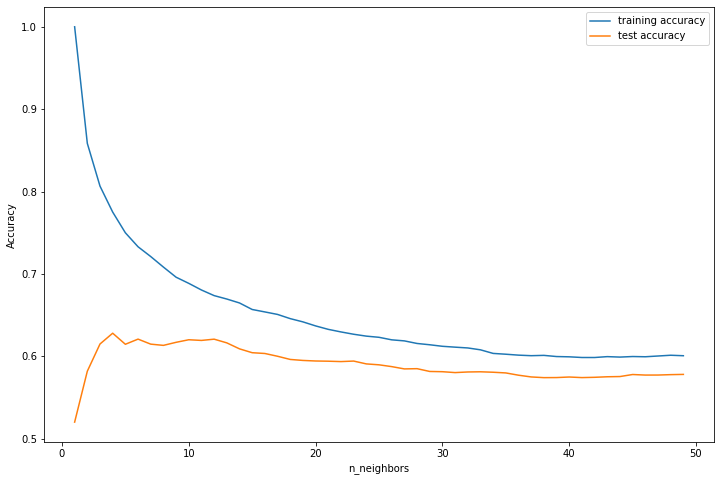

The optimal number of neighbors is 4


In [35]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 50)

for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train_STAND, y_train_STAND)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train_STAND, y_train_STAND))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test_STAND, y_test_STAND))

# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy,     label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()


# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

In [36]:
# INSTANTIATING a model with the optimal number of neighbors
knn_stand = KNeighborsRegressor(algorithm = 'auto',
                                n_neighbors = 18)

# FITTING the model based on the training data
knn_stand_fit = knn_stand.fit(X_train_STAND, y_train_STAND)

# PREDITCING on new data
knn_stand_pred = knn_stand_fit.predict(X_test_STAND)

# SCORING the results
print('KNN Training Score:', knn_stand.score(X_train_STAND, y_train_STAND).round(4))
print('KNN Testing Score :',  knn_stand.score(X_test_STAND, y_test_STAND).round(4))

# saving scoring data for future use
knn_stand_score_train = knn_stand.score(X_train_STAND, y_train_STAND).round(4)
knn_stand_score_test  = knn_stand.score(X_test_STAND, y_test_STAND).round(4)

# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_stand_score_train - knn_stand_score_test).round(4))
knn_stand_test_gap = abs(knn_stand_score_train - knn_stand_score_test).round(4)


KNN Training Score: 0.6457
KNN Testing Score : 0.5962
KNN Train-Test Gap: 0.0495


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

### <strong>Comparing Results</strong><br>
Let's compare the results of each model. In the interest of time, this code has already been written.

In [37]:
# comparing results

print(f"""
Model      Train Score      Test Score      Final model
-----      -----------      ----------      ----------
OLS        {lr_train_score}           {lr_test_score}          Yes
Lasso      {lasso_train_score}           {lasso_test_score}          No
ARD        {ard_train_score}            {ard_test_score}          No
KNN        {knn_stand_score_train}           {knn_stand_score_test}          No
""")


# creating a dictionary for model results
model_performance = {
    
    'Final Model'   : ['Yes', 'No', 'No', 'No'],
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD', 'KNN'],
           
    'Training' : [lr_train_score, lasso_train_score,
                  ard_train_score, knn_stand_score_train],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                  ard_test_score, knn_stand_score_test],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                        ard_test_gap, knn_stand_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                    len(ard_model_lst), "NA"],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst, "NA"]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./model_results/linear_model_performance.xlsx',
                           index = False)

model_performance


Model      Train Score      Test Score      Final model
-----      -----------      ----------      ----------
OLS        0.7625           0.7526          Yes
Lasso      0.6718           0.6764          No
ARD        0.761            0.7521          No
KNN        0.6457           0.5962          No



Final Model Model Type  Training  Testing  Train-Test Gap Model Size                                              Model
0         Yes        OLS    0.7625   0.7526          0.0099         33  [(intercept, 1.89), (log_TOTAL_MEALS_ORDERED, ...
1          No      Lasso    0.6718   0.6764          0.0046         21  [(intercept, -3876.96), (log_TOTAL_MEALS_ORDER...
2          No        ARD    0.7610   0.7521          0.0089         24  [(intercept, 1.87), (log_TOTAL_MEALS_ORDERED, ...
3          No        KNN    0.6457   0.5962          0.0495         NA                                                 NA

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

## Model Predictions
The following code will generate an Excel file that outputs the original revenue, the predictions for each model, and the deviations on each prediction.

In [38]:
# Reset train-test split, Full X-dataset (Normal Y) 
X_train_FULL, X_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            apprenticechef_data,         # x-variables
            apprenticechef_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

prediction_results = pd.DataFrame(data = {
    'Original Revenue'     : y_test_FULL,
    'LR Predictions'       : 10 ** lr_pred.round(decimals = 2),
    'Lasso Predictions'    : lasso_pred.round(decimals = 2),
    'ARD Predictions'      : 10 ** ard_pred.round(decimals = 2),
    'KNN'                  : 10 ** knn_stand_pred.round(decimals = 2),

    'LR Deviation'         : (10 ** lr_pred.round(decimals = 2)) - y_test_FULL,
    'Lasso Deviation'      : lasso_pred.round(decimals = 2) - y_test_FULL,
    'ARD Deviation'        : (10 ** ard_pred.round(decimals = 2)) - y_test_FULL,
    'KNN Deviations'       : (10 ** knn_stand_pred.round(decimals = 2)) - y_test_FULL})

prediction_results.to_excel(excel_writer = './model_results/linear_model_predictions.xlsx',
                            index = False)

In [39]:
prediction_results

Original Revenue  LR Predictions  Lasso Predictions  ARD Predictions          KNN  LR Deviation  Lasso Deviation  ARD Deviation  KNN Deviations
640           1000.000      812.830516             932.60       831.763771  1737.800829   -187.169484          -67.400    -168.236229      737.800829
49             645.000      616.595002             276.84       616.595002   851.138038    -28.404998         -368.160     -28.404998      206.138038
1307          1740.000     2089.296131            2259.98      2089.296131  2089.296131    349.296131          519.980     349.296131      349.296131
914           2502.500     1548.816619            1570.72      1513.561248  1995.262315   -953.683381         -931.780    -988.938752     -507.237685
803           4260.000     2754.228703            2735.34      2818.382931  2089.296131  -1505.771297        -1524.660   -1441.617069    -2170.703869
1052          1050.000     1000.000000            1161.67      1000.000000  1348.962883    -50.000000          111.670     -50.000000      298.962883
1506          3750.000     2290.867653            2352.45      2290.867653  1905.460718  -1459.132347        -1397.550   -1459.132347    -1844.539282
66            1190.000     1230.268771            1184.43      1202.264435  1659.586907     40.268771           -5.570      12.264435      469.586907
1645          4790.000     5128.613840            4588.73      5128.613840  3890.451450    338.613840         -201.270     338.613840     -899.548550
1525          5550.000     4168.693835            3996.55      4073.802778  2454.708916  -1381.306165        -1553.450   -1476.197222    -3095.291084
150           1770.000     2398.832919            2360.05      2344.228815  1995.262315    628.832919          590.050     574.228815      225.262315
1509          3454.500     2511.886432            2819.74      2630.267992  1905.460718   -942.613568         -634.760    -824.232008    -1549.039282
217           1550.000     1621.810097            1724.07      1659.586907  1445.439771     71.810097          174.070     109.586907     -104.560229
1580          1365.000     1445.439771            1517.52      1445.439771  1621.810097     80.439771          152.520      80.439771      256.810097
232           1760.000     2187.761624            2649.46      2041.737945  2344.228815    427.761624          889.460     281.737945      584.228815
1215          1380.000     2137.962090            2335.88      2187.761624  1905.460718    757.962090          955.880     807.761624      525.460718
1492          1920.000     2754.228703            2972.53      2818.382931  1949.844600    834.228703         1052.530     898.382931       29.844600
1078          2775.000     1862.087137            2073.28      1949.844600  1698.243652   -912.912863         -701.720    -825.155400    -1076.756348
1911          4275.000     2951.209227            3040.68      3090.295433  1995.262315  -1323.790773        -1234.320   -1184.704567    -2279.737685
1201          1345.000     1584.893192            1901.62      1584.893192  1584.893192    239.893192          556.620     239.893192      239.893192
1216          3900.000     3019.951720            2956.42      3019.951720  2570.395783   -880.048280         -943.580    -880.048280    -1329.604217
652           2125.000     2454.708916            2637.58      2454.708916  1995.262315    329.708916          512.580     329.708916     -129.737685
307           1488.000     1513.561248            1595.96      1548.816619  1698.243652     25.561248          107.960      60.816619      210.243652
317           1005.000      812.830516            1030.55       831.763771  1621.810097   -192.169484           25.550    -173.236229      616.810097
679           1190.000     1348.962883            1236.43      1348.962883  1445.439771    158.962883           46.430     158.962883      255.439771
1648          3259.500     2089.296131            2108.10      2089.296131  1949.844600  -1170.203869     